# Right, Clause, and OL_includes

Analysis of ordered liberty use by what right specifically was protected.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [159]:
ol_df = pd.read_csv("dataset.csv").drop(columns=["about", "Quotes", "notes", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "how used", "notes.1", "OL_context", "drew_from_1", "drew_from_2"])
ol_df

,Supreme Court Case,citation,year,just_mentioned,author,opinon,DPC,am_inc,other_am,clause_law,kind_1,kind_2,OL_includes,act_protect,OL_protect
0,Palko v. Connecticut v. Conneticut,302 U.S. 319,1937,0,Cardozo,1,1.0,6,-,double jeopardy,1,-,0,0,0
1,Lisenba v. California,314 U.S. 219,1941,NaN,Roberts,1,1.0,6,-,"""fair trial""",1,NaN,NaN,1,NaN
2,Bridges v. California,314 U.S. 252,1941,NaN,Frankfurter,2,0.0,-,1st amendment,NaN,1,NaN,NaN,1,NaN
3,Betts v. Brady,316 U.S. 455,1942,NaN,Black,3,1.0,6,-,"""right to counsel""",1,NaN,NaN,1,NaN
4,Schneiderman v. United States,320 U.S. 118,1943,NaN,Murphy,1,0.0,-,1st amendment,"""freedom of speech""",-,NaN,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Edwards v. Vannoy,141 S. Ct. 1547,2021,1,Gorsuch (Thomas joins),2,1.0,6,-,NaN,1,NaN,1,0,0
88,Edwards v. Vannoy,141 S. Ct. 1547,2021,1,Kagan (Sotomayor & Breyer join),3,1.0,6,-,NaN,1,NaN,1,0,1
89,Dobbs v. Jackson Women's Health Clinic,597 U.S. 215,2022,0,Alito,1,1.0,4,-,unenumerated,2,1,0,0,0
90,Dobbs v. Jackson Women's Health Clinic,597 U.S. 215,2022,0,Kavanaugh,2,1.0,4,-,unenumerated,2,1,0,0,0


In [160]:
# Create column for combining amendments
ol_df["amendments"] = ol_df["am_inc"].fillna("") + ", " + ol_df["other_am"].replace({"-":  ""}).fillna("")

## Basic Visualisations
We start by checking which rights most often come up in discussions of ordered liberty.

<Axes: ylabel='amendments'>

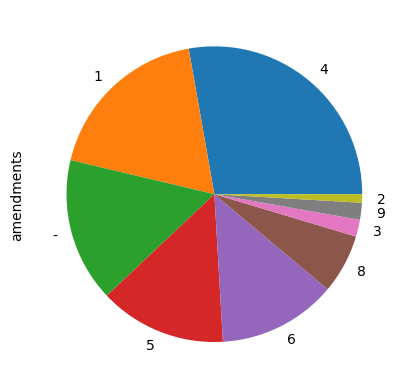

In [161]:
# Start by simply checking how often each amendment comes up:
amendments_series = ol_df["amendments"].str.split(r", |,").explode() \
                                       .replace({"4th": "4", "1st": "1", "1st amendment": "1"}) \
                                       .value_counts(dropna=True).iloc[1:]
amendments_series.plot(kind="pie")

Recall:
- 4th amendment concerns unreasonable search and seizure, arbitrary arrests, warrantless seraches, etc.
- 6th amendment concerns right to a fair trial (impartial jury, right to an attorney, etc.)
- `-` refers to cases that do not directly concern any of the other amendments (usually only concerned with the 14th)

In [162]:
# We can similarly check what clause laws are most often included (this is a top 10)
ol_df["clause_law"].str.replace('"', '').str.split(r";|, |,").explode().value_counts(dropna=True).iloc[:10]

due process                              14
unreasonable search and seizure           9
unenumerated                              7
cruel and unusual punishment              4
exclusionary rule                         4
double jeopardy                           3
defamation                                3
unenumerated privacy right                3
jury trial                                3
protection against self-incrimination     2
Name: clause_law, dtype: int64

## OL_includes, act_protect, OL_protect

We can now examine the ways in which ordered liberty is used to protect rights. From the codebook:

**OL_includes:** In the broad sense, would the ordered liberty that the justice mentions protect the right?
Ex: “Ordered liberty would protect the right, but in this particular case (due to a few technicalities), I don’t think it does.”

**act_protect:** Was the right protected [by the decision]? [This is irrespective of whether OL was used to protect or not.]

**OL_protect:** Did the justice’s application of ordered liberty protect the right whether or not it was in the holding?
If it’s a dissenting author, would they use ordered liberty to protect the right of the plaintiff/defendant if they were in the majority opinion?

<Axes: >

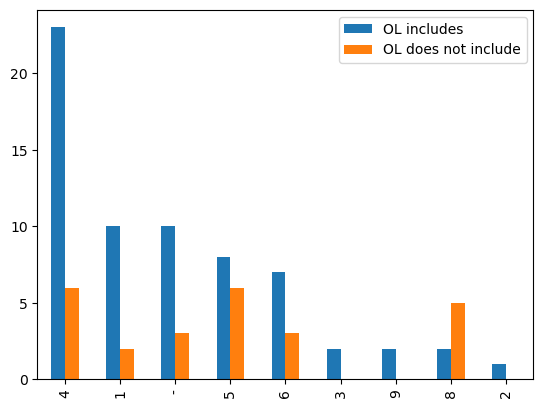

In [163]:
# Start with OL_includes
includes_df = ol_df[ol_df["OL_includes"] == "1"]
no_includes_df = ol_df[ol_df["OL_includes"] == "0"]

pd.concat({
   "OL includes": includes_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:],
   "OL does not include": no_includes_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:]
}, axis=1).plot.bar()

<Axes: >

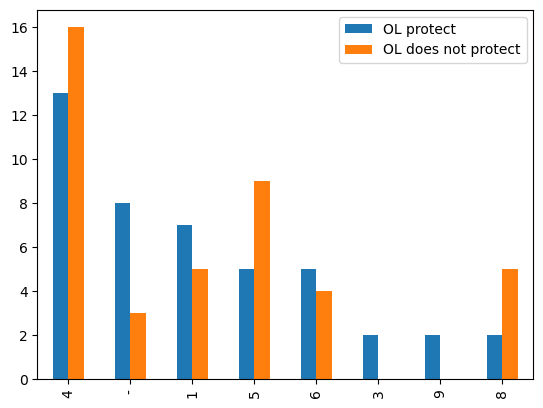

In [164]:
# Do the same with OL_protect
protect_df = ol_df[ol_df["OL_protect"] == "1"]
no_protect_df = ol_df[ol_df["OL_protect"] == "0"]

pd.concat({
   "OL protect": protect_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:],
   "OL does not protect": no_protect_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:]
}, axis=1).plot.bar()

<Axes: >

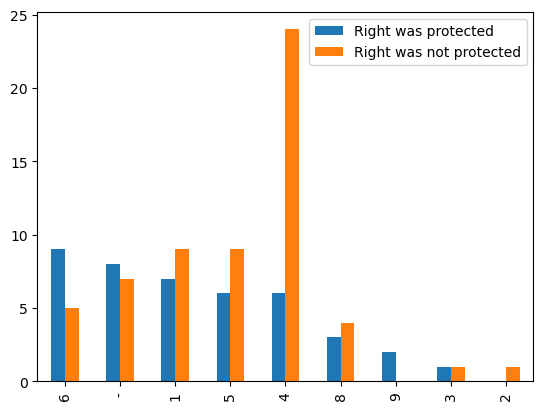

In [165]:
# And finally with act_protected
act_protect_df = ol_df[ol_df["act_protect"] == "1"]
no_act_protect_df = ol_df[ol_df["act_protect"] == "0"]

pd.concat({
   "Right was protected": act_protect_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:],
   "Right was not protected": no_act_protect_df["amendments"].str.split(r"[^0-9|-]*").explode().value_counts().iloc[1:]
}, axis=1).plot.bar()

## Evolution Over Time

We can now take a look at the evolution over time of the use of ordered liberty to protect rights.

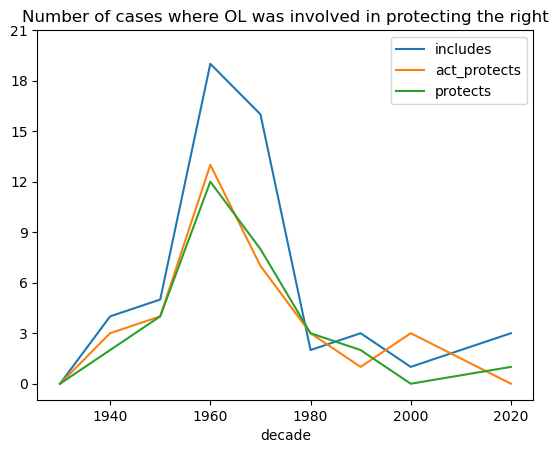

In [166]:
ol_df["decade"] = ol_df["year"].apply(lambda x: x // 10 * 10)

# df below is the number of cases in each of OL_includes, act_protect, and OL_protect that actually protect the right
decades_df_abs = pd.DataFrame({
    "decade": ol_df["decade"].unique(),
    "includes":     [ol_df[(ol_df["decade"] == decade) & ((ol_df["OL_includes"] == "0") | (ol_df["OL_includes"] == "1"))]["OL_includes"].astype(int).sum() 
                        for decade in ol_df["decade"].unique()],
    "act_protects": [ol_df[(ol_df["decade"] == decade) & ((ol_df["act_protect"] == "0") | (ol_df["act_protect"] == "1"))]["act_protect"].astype(int).sum() 
                        for decade in ol_df["decade"].unique()],
    "protects":     [ol_df[(ol_df["decade"] == decade) & ((ol_df["OL_protect"] == "0") | (ol_df["OL_protect"] == "1"))]["OL_protect"].astype(int).sum() 
                        for decade in ol_df["decade"].unique()]  
})

# df below is the proportion of cases in each of OL_includes, act_protect, and OL_protect that actually protect the right
# This is a bit noisy so I'm not gonna plot it, I'm leaving it here just in case.
decades_df_prop = pd.DataFrame({
    "decade": ol_df["decade"].unique(),
    "OL_includes":     [ol_df[(ol_df["decade"] == decade) & ((ol_df["OL_includes"] == "0") | (ol_df["OL_includes"] == "1"))]["OL_includes"].astype(int).mean() 
                        for decade in ol_df["decade"].unique()],
    "act_protect": [ol_df[(ol_df["decade"] == decade) & ((ol_df["act_protect"] == "0") | (ol_df["act_protect"] == "1"))]["act_protect"].astype(int).mean() 
                        for decade in ol_df["decade"].unique()],
    "OL_protect":     [ol_df[(ol_df["decade"] == decade) & ((ol_df["OL_protect"] == "0") | (ol_df["OL_protect"] == "1"))]["OL_protect"].astype(int).mean() 
                        for decade in ol_df["decade"].unique()]  
})

decades_df_abs.plot.line(x="decade")
plt.title("Number of cases where OL was involved in protecting the right")
plt.yticks(list(range(0, 22, 3)))
plt.show()

## Effectiveness of OL Arguments
We will now run some simple correlation tests to see how OL arguments affect the outcome of a case.

In [176]:
cleaned_df = ol_df[((ol_df["OL_includes"] == "0") | (ol_df["OL_includes"] == "1")) & ((ol_df["act_protect"] == "0") | (ol_df["act_protect"] == "1"))]
clean_includes = cleaned_df["OL_includes"].astype(int)
clean_act_prot = cleaned_df["act_protect"].astype(int)
should_protect = (clean_includes & ((cleaned_df["opinon"] == "1") | (cleaned_df["opinon"] == "2"))) | \
                    ((~clean_includes) & (cleaned_df["opinon"] == "3"))
print(f"Correlation between using OL argument and being in the majority: r = {round(np.corrcoef(should_protect.astype(int), clean_act_prot)[0][1], 4)}.")

Correlation between using OL argument and being in the majority: r = 0.3649.
